In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bottle_df = pd.read_csv('../bottle.csv', dtype={'MeanAq':float, 'ph1': object})
bottle_df.head()

/Users/brittanyminor/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Start by dropping rows where temperature is null

In [2]:
bottle_temp_subset= bottle_df[bottle_df['T_degC'].notnull()]
bottle_temp_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853900 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              853900 non-null  int64  
 1   Btl_Cnt              853900 non-null  int64  
 2   Sta_ID               853900 non-null  object 
 3   Depth_ID             853900 non-null  object 
 4   Depthm               853900 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               814247 non-null  float64
 7   O2ml_L               691287 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               853900 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               12164 non-null   float64
 15  S_prec           

In [3]:
# drop the columns where there is less than 200000 rows 

bottle_nonull = pd.DataFrame(bottle_temp_subset.dropna(axis =1, thresh =200000))
bottle_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853900 entries, 0 to 864862
Data columns (total 49 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Cst_Cnt      853900 non-null  int64  
 1   Btl_Cnt      853900 non-null  int64  
 2   Sta_ID       853900 non-null  object 
 3   Depth_ID     853900 non-null  object 
 4   Depthm       853900 non-null  int64  
 5   T_degC       853900 non-null  float64
 6   Salnty       814247 non-null  float64
 7   O2ml_L       691287 non-null  float64
 8   STheta       812174 non-null  float64
 9   O2Sat        661274 non-null  float64
 10  Oxy_µmol/Kg  661268 non-null  float64
 11  RecInd       853900 non-null  int64  
 12  T_prec       853900 non-null  float64
 13  S_prec       814247 non-null  float64
 14  P_qual       663060 non-null  float64
 15  O2Satq       206834 non-null  float64
 16  ChlorA       222184 non-null  float64
 17  Chlqua       631291 non-null  float64
 18  Phaeop       222183 non-

#### Drop columns that are just quality codes

In [4]:
# identify columns that end in q 
import re
bottle_qual = bottle_nonull.filter(regex='q$', axis =1)
bottle_qual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853900 entries, 0 to 864862
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   O2Satq  206834 non-null  float64
 1   PO4q    443330 non-null  float64
 2   NO2q    519845 non-null  float64
 3   NO3q    520441 non-null  float64
 4   NH3q    797336 non-null  float64
 5   C14A1q  839259 non-null  float64
 6   C14A2q  839257 non-null  float64
 7   DarkAq  832146 non-null  float64
 8   MeanAq  832145 non-null  float64
dtypes: float64(9)
memory usage: 65.1 MB


In [5]:
# drop columns that end in q
bottle_q_list = bottle_qual.columns.tolist()
bottle_noq = bottle_nonull.drop(bottle_q_list, axis=1)
bottle_noq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853900 entries, 0 to 864862
Data columns (total 40 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Cst_Cnt      853900 non-null  int64  
 1   Btl_Cnt      853900 non-null  int64  
 2   Sta_ID       853900 non-null  object 
 3   Depth_ID     853900 non-null  object 
 4   Depthm       853900 non-null  int64  
 5   T_degC       853900 non-null  float64
 6   Salnty       814247 non-null  float64
 7   O2ml_L       691287 non-null  float64
 8   STheta       812174 non-null  float64
 9   O2Sat        661274 non-null  float64
 10  Oxy_µmol/Kg  661268 non-null  float64
 11  RecInd       853900 non-null  int64  
 12  T_prec       853900 non-null  float64
 13  S_prec       814247 non-null  float64
 14  P_qual       663060 non-null  float64
 15  ChlorA       222184 non-null  float64
 16  Chlqua       631291 non-null  float64
 17  Phaeop       222183 non-null  float64
 18  Phaqua       631295 non-

In [6]:
# Drop columns ending in qual or qua

# create a list of the columns to drop
drop_list = ['P_qual', 'Chlqua', 'Phaqua', 'SiO3qu']
bottle_noq3 = bottle_noq.drop(drop_list, axis =1)

bottle_noq3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853900 entries, 0 to 864862
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Cst_Cnt      853900 non-null  int64  
 1   Btl_Cnt      853900 non-null  int64  
 2   Sta_ID       853900 non-null  object 
 3   Depth_ID     853900 non-null  object 
 4   Depthm       853900 non-null  int64  
 5   T_degC       853900 non-null  float64
 6   Salnty       814247 non-null  float64
 7   O2ml_L       691287 non-null  float64
 8   STheta       812174 non-null  float64
 9   O2Sat        661274 non-null  float64
 10  Oxy_µmol/Kg  661268 non-null  float64
 11  RecInd       853900 non-null  int64  
 12  T_prec       853900 non-null  float64
 13  S_prec       814247 non-null  float64
 14  ChlorA       222184 non-null  float64
 15  Phaeop       222183 non-null  float64
 16  PO4uM        410803 non-null  float64
 17  SiO3uM       352597 non-null  float64
 18  NO2uM        336242 non-

In [7]:
# Drop the unneccessary columns

# create a list of the columns to drop
drop_list = ['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID']
bottle_noq2 = bottle_noq3.drop(drop_list, axis =1)

bottle_noq2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853900 entries, 0 to 864862
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Depthm       853900 non-null  int64  
 1   T_degC       853900 non-null  float64
 2   Salnty       814247 non-null  float64
 3   O2ml_L       691287 non-null  float64
 4   STheta       812174 non-null  float64
 5   O2Sat        661274 non-null  float64
 6   Oxy_µmol/Kg  661268 non-null  float64
 7   RecInd       853900 non-null  int64  
 8   T_prec       853900 non-null  float64
 9   S_prec       814247 non-null  float64
 10  ChlorA       222184 non-null  float64
 11  Phaeop       222183 non-null  float64
 12  PO4uM        410803 non-null  float64
 13  SiO3uM       352597 non-null  float64
 14  NO2uM        336242 non-null  float64
 15  NO3uM        335927 non-null  float64
 16  R_Depth      853900 non-null  float64
 17  R_TEMP       853900 non-null  float64
 18  R_POTEMP     818816 non-

In [8]:
bottle_noq2_subset= bottle_noq2[bottle_noq2['Phaeop'].notnull()]
bottle_noq2_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222183 entries, 472997 to 864862
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Depthm       222183 non-null  int64  
 1   T_degC       222183 non-null  float64
 2   Salnty       221670 non-null  float64
 3   O2ml_L       221417 non-null  float64
 4   STheta       221493 non-null  float64
 5   O2Sat        220774 non-null  float64
 6   Oxy_µmol/Kg  220772 non-null  float64
 7   RecInd       222183 non-null  int64  
 8   T_prec       222183 non-null  float64
 9   S_prec       221670 non-null  float64
 10  ChlorA       222179 non-null  float64
 11  Phaeop       222183 non-null  float64
 12  PO4uM        214133 non-null  float64
 13  SiO3uM       215513 non-null  float64
 14  NO2uM        209506 non-null  float64
 15  NO3uM        214888 non-null  float64
 16  R_Depth      222183 non-null  float64
 17  R_TEMP       222183 non-null  float64
 18  R_POTEMP     221764

## Perform Feature Selection

I looked at correlations to look at what features were highly correlated with each other and therefore redundant and also which features were highly correlated (greater than .75) with water temperature (T_degC) and eliminated those features.

In [9]:

bottle_noq2.corr()

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,...,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_CHLA,R_PHAEO,R_PRES
Depthm,1.000000,-0.681201,0.572867,-0.591745,0.582710,-0.595547,-0.589175,0.081438,0.019422,0.003203,...,0.927109,-0.591745,-0.596503,0.846635,0.667190,0.687797,-0.158805,-0.280471,-0.202560,0.999994
T_degC,-0.681201,1.000000,-0.505266,0.795700,-0.829155,0.850596,0.795543,-0.066507,-0.041076,-0.036218,...,-0.799025,0.795700,0.850365,-0.840343,-0.904179,-0.925476,0.097463,0.108925,0.014987,-0.679852
Salnty,0.572867,-0.505266,1.000000,-0.824413,0.603470,-0.790231,-0.824338,0.065717,-0.019075,-0.083097,...,0.670143,-0.824414,-0.790814,0.796058,0.825924,0.849371,-0.151779,-0.031125,-0.004848,0.571640
O2ml_L,-0.591745,0.795700,-0.824413,1.000000,-0.889568,0.993217,0.999999,-0.071445,0.001241,0.032385,...,-0.767254,0.999998,0.993221,-0.894011,-0.973532,-0.970013,0.188524,0.269964,0.152112,-0.589942
STheta,0.582710,-0.829155,0.603470,-0.889568,1.000000,-0.876899,-0.890043,0.060133,0.026236,0.006887,...,0.703216,-0.889568,-0.929107,0.864652,0.948210,0.958110,-0.107891,-0.084765,0.008732,0.581409
O2Sat,-0.595547,0.850596,-0.790231,0.993217,-0.876899,1.000000,0.993343,-0.066473,-0.009523,0.021311,...,-0.775361,0.993215,0.999999,-0.890059,-0.984223,-0.983084,0.170200,0.250458,0.126179,-0.593737
Oxy_µmol/Kg,-0.589175,0.795543,-0.824338,0.999999,-0.890043,0.993343,1.000000,-0.068444,-0.005486,0.032187,...,-0.767216,0.999997,0.993352,-0.894687,-0.974889,-0.970844,0.190172,0.272914,0.154766,-0.587319
RecInd,0.081438,-0.066507,0.065717,-0.071445,0.060133,-0.066473,-0.068444,1.000000,0.041580,0.358089,...,0.087571,-0.071443,-0.066214,0.047042,0.074864,0.041624,-0.058817,-0.021022,-0.042005,0.081305
T_prec,0.019422,-0.041076,-0.019075,0.001241,0.026236,-0.009523,-0.005486,0.041580,1.000000,0.098015,...,0.018483,0.001240,-0.009476,0.100986,0.028754,0.040587,-0.001358,0.012540,0.009525,0.019445
S_prec,0.003203,-0.036218,-0.083097,0.032385,0.006887,0.021311,0.032187,0.358089,0.098015,1.000000,...,0.014663,0.032393,0.020521,-0.006075,-0.055003,0.016118,-0.002797,-0.000224,-0.000571,0.003286


In [10]:
# drop redundant columns and columns highly correlated with temp (over .75), but keep the ones with more data
to_drop = ['Depthm', 'R_TEMP', 'R_POTEMP','Salnty', 'STheta', 'Oxy_µmol/Kg', 'R_O2', 'O2Sat', 'SiO3uM', 'PO4uM', 
           'NO2uM', 'NO3uM', 'R_DYNHT', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'RecInd', 'O2ml_L', 'R_SIGMA', 'R_PO4',
          'R_SIO3', 'R_NO3', 'R_SVA', 'R_O2Sat']
bottle_no_corr = bottle_noq2_subset.drop(to_drop, axis=1)
bottle_no_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222183 entries, 472997 to 864862
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   T_degC      222183 non-null  float64
 1   T_prec      222183 non-null  float64
 2   S_prec      221670 non-null  float64
 3   ChlorA      222179 non-null  float64
 4   Phaeop      222183 non-null  float64
 5   R_Depth     222183 non-null  float64
 6   R_SALINITY  221670 non-null  float64
 7   R_NO2       209508 non-null  float64
dtypes: float64(8)
memory usage: 15.3 MB


In [11]:
bottle_no_nan = bottle_no_corr.dropna(axis =0)
bottle_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209388 entries, 513063 to 864862
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   T_degC      209388 non-null  float64
 1   T_prec      209388 non-null  float64
 2   S_prec      209388 non-null  float64
 3   ChlorA      209388 non-null  float64
 4   Phaeop      209388 non-null  float64
 5   R_Depth     209388 non-null  float64
 6   R_SALINITY  209388 non-null  float64
 7   R_NO2       209388 non-null  float64
dtypes: float64(8)
memory usage: 14.4 MB


In [12]:
drop_this = ['T_prec', 'S_prec']
bottle_clean = pd.DataFrame(bottle_no_nan.drop(drop_this, axis =1))
bottle_clean.tail()

,T_degC,ChlorA,Phaeop,R_Depth,R_SALINITY,R_NO2
864858,18.744,0.905,0.176,0.0,33.408,0.03
864859,18.744,0.905,0.176,2.0,33.408,0.03
864860,18.692,0.915,0.182,5.0,33.415,0.03
864861,18.161,1.078,0.313,10.0,33.406,0.03
864862,17.533,2.118,0.614,15.0,33.388,0.05


[-0.21994855 -0.35351959 -0.04163806 -0.         -0.        ]


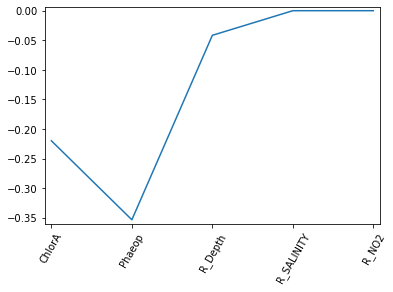

In [23]:
# Import Lasso
from sklearn.linear_model import Lasso

# need arrays and need to reshape them
X = bottle_clean.drop('T_degC', axis=1)
y = np.array(bottle_clean['T_degC']).reshape(-1,1)

bottle_clean_columns= bottle_clean.drop('T_degC', axis=1).columns
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.1)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)

# Plot the coefficients
# coefficients are used for creating the regression equation y = mx + mx1 + mx2...+ mxn + b
plt.plot(range(len(bottle_clean_columns)), lasso_coef)
plt.xticks(range(len(bottle_clean_columns)), bottle_clean_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

#This seems to indicate that none of the features are good predictors?

In [15]:
# run linear regression with this subset of values
bottle_clean_useful= pd.DataFrame(bottle_clean[['ChlorA','Phaeop','R_Depth']])
bottle_clean_useful.head()

,ChlorA,Phaeop,R_Depth
513063,0.85,0.19,0.0
513064,0.85,0.19,1.0
513065,0.65,0.23,10.0
513066,0.62,0.24,11.0
513067,0.58,0.22,20.0


#### I tried to run this recursive feature selection several times and it kept freezing my kernel

In [67]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR


In [ ]:
X = bottle_clean.drop('T_degC', axis=1)
y = bottle_clean['T_degC']

estimator = SVR(kernel ='linear')
selector =RFE(estimator, n_features_to_select=3)
selector = selector.fit(X,y)
print(selector.support_)
print(selector.ranking_)

## 3. Perform multiple linear regression

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X = bottle_clean_useful
y = np.array(bottle_clean['T_degC']).reshape(-1,1)
#confirm the arrays are shaped appropriately
print(X.shape, y.shape)

reg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=33)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

#fit the regression
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
accuracy_score = reg.score(X_test, y_test)
print(y_pred)
print(accuracy_score)
print(reg.coef_)
print(reg.intercept_)

(209388, 3) (209388, 1)
[[11.98093634]
 [12.7656438 ]
 [14.79855179]
 ...
 [11.88191689]
 [15.28494703]
 [13.60748786]]
0.6183121026190006
[[ 0.05581277 -0.68522332 -2.49437097]]
[12.94962018]


#### Final equation
y = 

In [28]:
from statsmodels.formula.api import ols

# fit a linear regression of temp with the three features and no interactons
mdl_temp_vs_depth_chlor_phae = ols('T_degC ~ ChlorA + Phaeop + R_Depth', data=bottle_clean).fit()

# Print its coefficients
print(mdl_temp_vs_depth_chlor_phae.params)
print(mdl_temp_vs_depth_chlor_phae.summary())

Intercept    16.469678
ChlorA        0.047099
Phaeop       -2.446477
R_Depth      -0.042603
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 T_degC   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                 1.154e+05
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        22:45:38   Log-Likelihood:            -4.2920e+05
No. Observations:              209388   AIC:                         8.584e+05
Df Residuals:                  209384   BIC:                         8.585e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [29]:
# fit a linear regression of temp with the three features and all interactons
mdl_temp_vs_depth_chlor_phae = ols('T_degC ~ ChlorA * Phaeop * R_Depth', data=bottle_clean).fit()

# Print its coefficients
print(mdl_temp_vs_depth_chlor_phae.params)
print(mdl_temp_vs_depth_chlor_phae.summary())

Intercept                16.648636
ChlorA                   -0.244666
Phaeop                   -2.805792
ChlorA:Phaeop             0.117623
R_Depth                  -0.042861
ChlorA:R_Depth            0.008665
Phaeop:R_Depth           -0.013488
ChlorA:Phaeop:R_Depth     0.003449
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 T_degC   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                 5.174e+04
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        22:46:35   Log-Likelihood:            -4.2625e+05
No. Observations:              209388   AIC:                         8.525e+05
Df Residuals:                  209380   BIC:                         8.526e+05
Df Model:                           7                                    

## 4. Which regression approach worked better?

Multiple linear regression worked much better than linear regression trying to predict temperature from salinity.

When I tried to predict temp from salinity I got an accuracy score of .25 with multiple linear regression I got an accuracy score of .62

Using statsmodel to run Ordinary Least Squares regression (which is the same type of regression sklearn was running), I got the same accuracy score without interactions (.62) and marginally higher with interactions (.63).

## 5. Run multiple logistic regression on diabetes dataset

In [16]:
diabetes_df = pd.read_csv('../diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [61]:
#Simplest logistic regression approach
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
#sample_pred=[[6,148,72,35,0,33.6,0.627,50]]
y_predicted = clf.predict(X_test)
print(clf.score(X_test,y_test))

0.7359307359307359


In [59]:
#Try to optimize logistic regression approach
clf1 = LogisticRegression(class_weight='balanced', random_state=0).fit(X_train, y_train)
#sample_pred=[[6,148,72,35,0,33.6,0.627,50]]
y_predicted_1 = clf1.predict(X_test)
print(clf1.score(X_test,y_test))

0.7619047619047619


## 6. What other ways to look at accuracy? What makes the most sense for this dataset?

You can use precision and recall as metrics. Recall or the true positive rate might be the best for this datasey because you want to make sure aaccurately diagnosing people as much as possible.

In [62]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       150
           1       0.66      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.69       231
weighted avg       0.73      0.74      0.73       231



In [63]:
confusion_matrix(y_test, y_predicted)

array([[128,  22],
       [ 39,  42]])

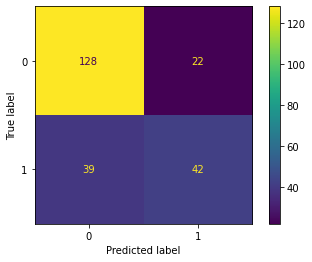

In [51]:
plot_confusion_matrix(clf, X_test, y_test) 
plt.show() 

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)

#get predicted outcomes
knn.fit(X_train,y_train)
y_predicted = knn.predict(X_test)
#print(y_predicted)
print(knn.score(X_test, y_test))

0.7662337662337663


In [53]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.71      0.57      0.63        81

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



In [54]:
confusion_matrix(y_test, y_predicted)

array([[131,  19],
       [ 35,  46]])

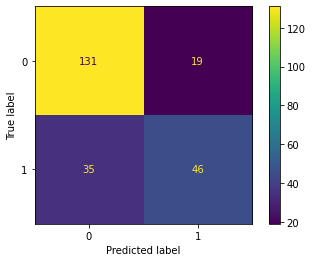

In [45]:
plot_confusion_matrix(knn, X_test, y_test) 
plt.show() 

## 7. KNN vs Logistic regression
KNN seemed to do better, it appears to have a higher accuracy score and a better recall.